# Classification Analysis(분류분석)

분류분석은 데이터 분석에서 주어진 데이터의 특징을 바탕으로 데이터가 속할 클래스를 예측하는 방법입니다. 이는 지도 학습(supervised learning) 기법의 한 종류로, 이미 분류가 되어 있는 데이터(라벨이 있는 데이터)를 사용하여 모델을 학습시킨 후, 새로운 데이터의 분류를 예측합니다.

분류분석의 주요 특징은 이산형 결과를 예측한다는 점입니다.

* 로지스틱 회귀 (Logistic Regression): 이진 또는 다중 클래스 분류를 위한 기법.
* 의사결정 나무 (Decision Tree): 데이터를 기반으로 여러 가지 분기점을 설정하여 클래스를 예측.
* 서포트 벡터 머신 (Support Vector Machine, SVM): 데이터 간의 경계를 최대한 멀리 두는 분류 기법.
* k-최근접 이웃 (k-Nearest Neighbors, k-NN): 가장 가까운 k개의 데이터를 기준으로 분류.
* 나이브 베이즈 (Naive Bayes): 베이즈 정리를 기반으로 한 확률적 분류 방법.
* 랜덤 포레스트 (Random Forest): 여러 개의 의사결정 나무를 결합하여 예측 성능을 높이는 방법.
* 인공 신경망 (Artificial Neural Networks): 딥러닝에서 사용하는 기법으로 복잡한 패턴을 학습.

사이킷런의 데이터세트로부터 붓꽃 데이터의 독립변수와 종속변수를 가져온 뒤 이를 데이터프레임으로 변환한다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris() # iris 로드하기
iris_dt = iris.data # iris/data는 독립변수(feature)만으로 된 numpy 형태
iris_label = iris.target # isis.target은 종속변수(label) 값을 numpy 형태로 가짐

df = pd.DataFrame(data=iris_dt, columns=iris.feature_names)
df['Species'] = iris_label

아이리스 데이터의 로드 상태 확인

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


0은 Setosa, 1은 Versicolor, 2는 Virginica

In [3]:
 df['Species'].unique()

array([0, 1, 2])

데이터 행과 열을 확인

In [4]:
df.shape

(150, 5)

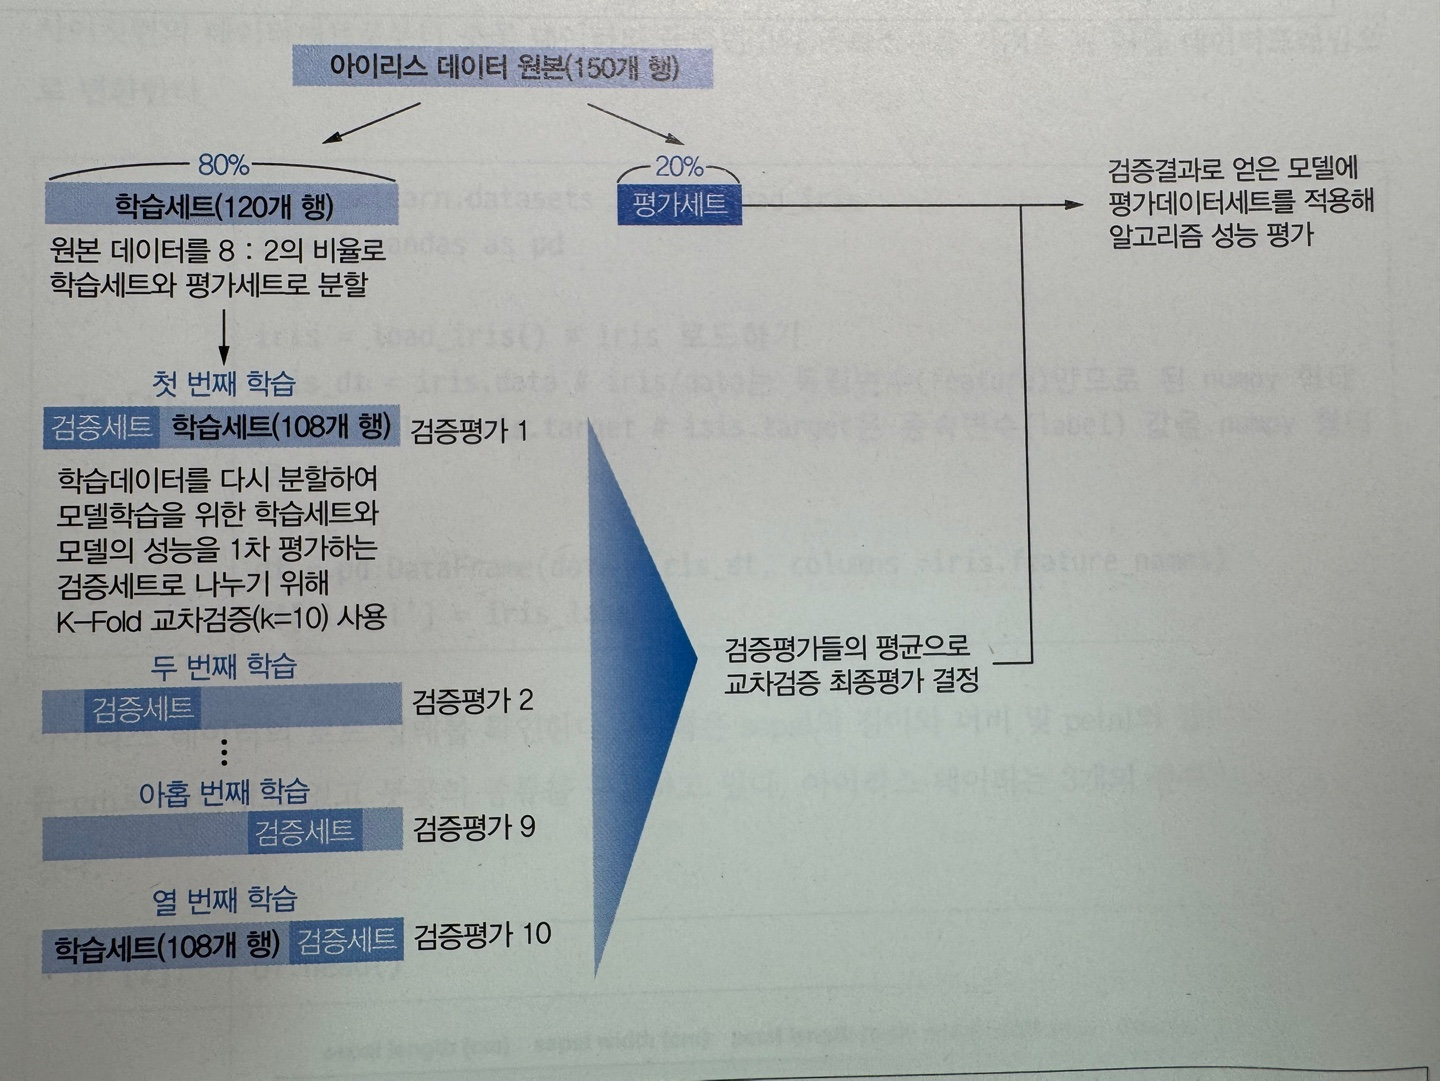

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터의 20%는 테스트용, 80%는 학습용으로 사용
# stratify=iris_label은 학습 세트와 테스트 세트가 원본 데이터셋과 동일한 비율로 클래스가 분포되도록 보장
# random_state=0을 설정하여 동일한 방식으로 데이터를 분할할 수 있게 재현 가능성을 보장
x_train, x_test, y_train, y_test = train_test_split(iris_dt, iris_label, test_size=0.2, random_state=0, stratify=iris_label)

### 3. 전처리

결측치가 존재하는지 확인

In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

### 4. 모델학습

의사결정나무(Decision Tree)를 사용해 분류 분석을 수행한다.   
트리의 깊이를 5, 3, 1로 설정한 의사결정나무 모델 세 가지를 생성한다.

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100) 

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 검증 정확도:  0.9417


트리의 깊이를 3으로 설정한 dtree_clf_3 모델로 테이터를 학습, 교차검증

In [10]:
scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도:  0.925


트리의 깊이를 1로 설정한 dtree_clf_1 모델로 데이터 학습, 교차검증

In [11]:
scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


### 5. 성능평가 및 예측값 저장

In [12]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)
from sklearn.metrics import accuracy_score
print('의사결정나무(교차검증 후) 예측 정확도: {0:.5f}'.format(accuracy_score(y_test, pred)))

의사결정나무(교차검증 후) 예측 정확도: 0.96667


실제값과 예측 결과를 비교하도록 데이터프레임으로 저장

In [13]:
pred = pd.DataFrame(pred, columns=['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,2
4,0


컬럼명 actual Species 데이터프레임으로 변환

In [14]:
actual = pd.DataFrame(y_test, columns=['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,0
3,2
4,0


pd.concat()으로 pred와 actual을 병합한다.

In [15]:
classify_result = pd.concat([actual, pred], axis=1)
classify_result.to_csv('clf_result.csv', index=False, encoding='utf-8-sig')
classify_result.head()

,actual Species,pred Species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0
